In [46]:
import sys
sys.path.insert(1, '../src/magpies/')
from magpies import *
from atmos import *
import numpy as np
from math import *
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt

In [47]:
## Radius and mass of neutron star
Rns = 12  ## km
Mns = 1.4 ## M_solar
eph = np.linspace (0.25, 2.99, 275) ## Nicer soft X-ray range
nphot = 1e6 

In [48]:
theta = np.linspace (0, pi, 100)  ## theta coordinates
phi   = np.linspace (0, 2*pi, 99) ## phi coordinates

theta1, phi1 = np.meshgrid (theta, phi)

Ts = np.full ((theta1.shape), 1e6) ## Surface map where every point has temperature of 10^6 K
Teff = compute_Teff(theta, phi, Rns, Ts)

In [49]:
print ("Here we check that Teff = 1e6 within acceptable accuracy")
print ("Teff = ", Teff, ' log_{10} Teff = ', log10(Teff))

Here we check that Teff = 1e6 within acceptable accuracy
Teff =  1002520.2830597103  log_{10} Teff =  6.001093168057105


In [50]:
## Compute spectra by numerical integration over the NS surface
sp_red_n, map_of_visible = get_redshifted_spectra_pole_photons (theta, phi, Ts, Rns, Mns, eph, nphot)

../src/magpies/magpies.py:148: RuntimeWarning: divide by zero encountered in log
  x = (1.0 - u)*y*(1.0 + u*u*y*y/112.0 - e/100.0*u*y*(np.log(1-y/2.0) + y/2))
../src/magpies/magpies.py:150: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(res)


In [51]:
## Compute spectra using single blackbody model
sp_1BB = single_BB_photons(Teff, Rns, Mns, eph, nphot)

In [52]:
## Compute spectra using two-blackbody model
sp_2BB = two_BB_photons([0.3, 0.7, 1.0, 1.0], Teff, Rns, Mns, eph, nphot)

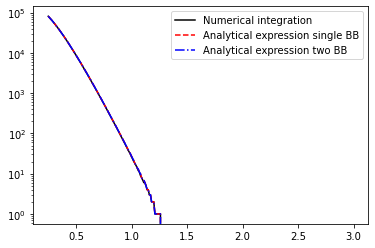

In [53]:
plt.plot (eph, sp_red_n, 'k-', label='Numerical integration')
plt.plot (eph, sp_1BB, 'r--', label='Analytical expression single BB')
plt.plot (eph, sp_2BB, 'b-.', label='Analytical expression two BB')
plt.yscale('log')
plt.legend()

In [54]:
print (fit_spectral_model_Cstat (Teff, Rns, Mns, sp_red_n, eph, nphot))

[0.5, 0.5, 0.9973358154296872, 0.9973358154296872, 2.3404894608787, 0.0033791433211303777]
